# AUTOMATIC ROCK CLASSIFICATION
### Misael M. Morales, Oriyomi Raheem, Carlos Torres-Verdin, and Michael Pyrcz, UT-Austin; Murray Christie, Vladimir Rabinovich, S&P Global
#### 2024, Digital Reservoir Characterization Technology (DiReCT)
***

In [1]:
from auto_rock_classification import *
check_tf_gpu()

2024-08-27 16:23:21.838622: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-27 16:23:21.838668: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-27 16:23:21.839320: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-27 16:23:21.843016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 16:23:22.444263: W tensorflow/compiler/tf2

------------------------------------------------------------
----------------------- VERSION INFO -----------------------
TF version: 2.15.0 | # Device(s) available: 2
TF Built with CUDA? True | CUDA: 12.2 | cuDNN: 8
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU') 
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
------------------------------------------------------------



2024-08-27 16:23:23.201840: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-27 16:23:23.221944: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-27 16:23:23.221992: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [2]:
arc = RockClassification()
arc.__dict__

{'show_id': False,
 'folder': 'Data',
 'subfolder': 'UT Export core classification',
 'file': 'GULFCOAST & TX CORE.csv',
 'outfile': 'GULFCOAST & TX CORE postprocess.csv',
 'minpts': 30,
 'random_state': 2024,
 'well_number': 0,
 'prop': 'PORO',
 'n_classes': None,
 'method': None,
 'birch_threshold': 0.1,
 'cutoffs': None,
 'kexp': 0.588,
 'texp': 0.732,
 'pexp': 0.864,
 'phimin': None,
 'phimax': None,
 'kmin': None,
 'kmax': None,
 's1': 10,
 'sw': 80,
 's2': 50,
 'ms': 30,
 'alpha': 0.25,
 'alphag': 0.33,
 'cmap0': 'plasma',
 'cmap': 'jet',
 'figsize': (15, 9),
 'showfig': True,
 'savefig': True,
 'return_data': False,
 'verbose': True,
 'plate': <Projected CRS: +proj=eqc +ellps=WGS84 +a=6378137.0 +lon_0=0.0 +to ...>
 Name: unknown
 Axis Info [cartesian]:
 - E[east]: Easting (unknown)
 - N[north]: Northing (unknown)
 - h[up]: Ellipsoidal height (metre)
 Area of Use:
 - undefined
 Coordinate Operation:
 - name: unknown
 - method: Equidistant Cylindrical
 Datum: Unknown based on WGS 

In [3]:
arc.load_data()

All data shape: (102797, 88)


In [ ]:
# RUN PROCESSING
# this module will load the Core data for all wells, and do:
# (1) filter the wells based on the minimum number of core points specified
# (2) apply a clustering technique to estimate the rock classes along the well
# (3) save the results of the predicted classes in a csv file for all wells
RockClassification(minpts=30, method='gmm', n_classes=3).run_processing()

In [ ]:
# RUN DASHBOARD
# this module will load the Core2Log Rock Classification dashboard:
# (1) specify the well to analyze
# (2) specify the rock classification technique to use
#   (2a) if the technique is physics-based: specify cutoffs
#   (2b) if the technique is ML-based: specify the number of classes
# (3) run the dashboard to visualize results
RockClassification(minpts=30, well_number=1104, method='birch', n_classes=3).run_dashboard()

In [ ]:
# COMPARISON
# compare all techniques for a given well (user must define cutoffs and n_classes accordingly)
RockClassification(minpts=30, well_number=1104).run_comparison(n_classes=3, 
                                                    leverett_cutoffs=[10,20,40], 
                                                    winland_cutoffs=[150,300,500], 
                                                    lorenz_cutoffs=[0.5,2,5])

All data shape: (102797, 88)
Total number of wells: 1379
--------------------------------------------------------------------------------
                Automatic Core2Log Rock Classification Dashboard
--------------------------------------------------------------------------------
Method: KMEANS | Number of Classes: 3 | Cutoffs: None
Well shape: (39, 5)
--------------------------------------------------------------------------------


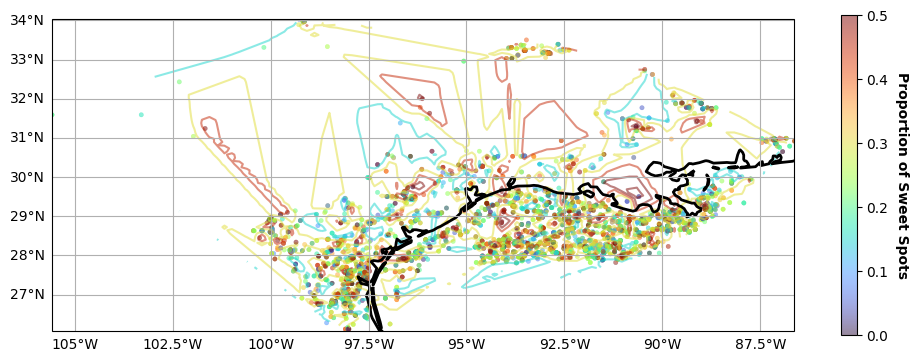

Elapsed time: 13.685 seconds
--------------------------------------------------------------------------------


In [5]:
# SPATIAL DISTRIBUTION
# visualize the spatial distribution of sweet spots
RockClassification().run_spatial_map(alpha=0.5)

***
# END